In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_excel('data.xlsx')

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [ ]:
data1.sample(7)

,Hours,Scores
6,9.2,88
15,8.9,95
14,1.1,17
19,7.4,69
17,1.9,24
13,3.3,42
12,4.5,41


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data1.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#Checking Duplicates in Data
data1.duplicated().sum()

0

In [ ]:
# Checking NULL values in Data w.r.t Percentage
data1.isnull().sum() * 100 / len(data1)

Hours     0.0
Scores    0.0
dtype: float64

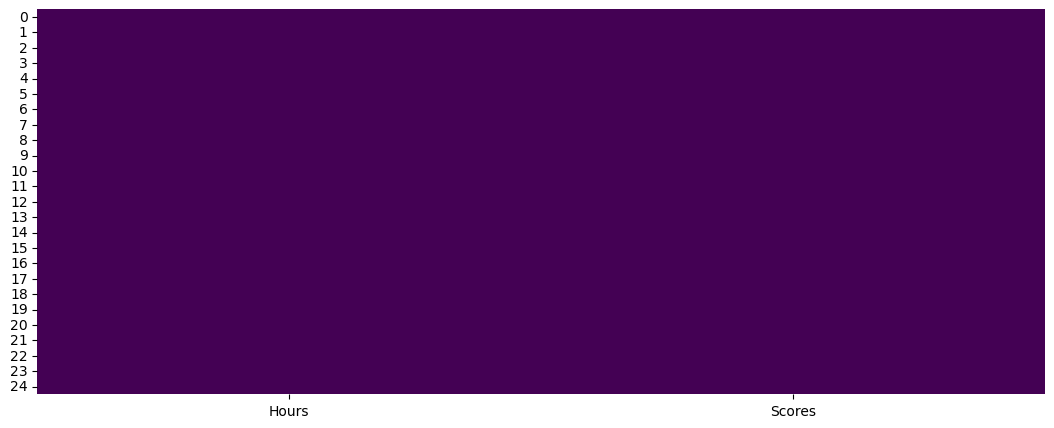

In [ ]:
# Visualizing NULL values in Data
plt.figure(figsize=(13,5))
sns.heatmap(data1.isnull(), cmap='viridis', cbar=False)
plt.show()

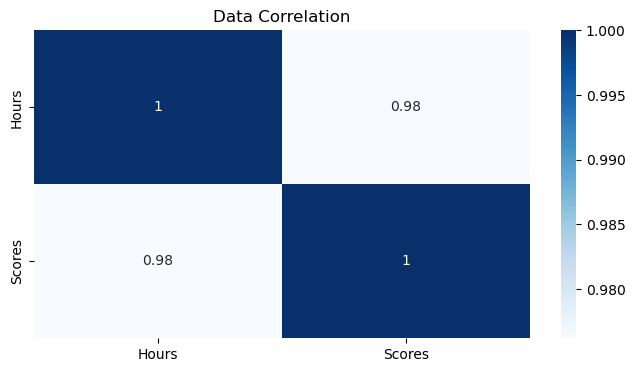

In [ ]:
# Checking the Correlation of Data
plt.figure(figsize=(8,4))
sns.heatmap(data1.corr(), annot=True, cmap='Blues')
plt.title('Data Correlation')
plt.show()

In [ ]:
# Data Splitting
X = data1.drop('Scores', axis=1)
y = data1['Scores']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20, 1), (20,), (5, 1), (5,))

In [ ]:
# Linear Regression Model Training
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
lr_pred = lr.predict(X_test)
pd.DataFrame(np.c_[y_test,lr_pred],columns=['Actual','Predicted'])

,Actual,Predicted
0,81.0,83.188141
1,30.0,27.032088
2,21.0,27.032088
3,76.0,69.633232
4,62.0,59.951153


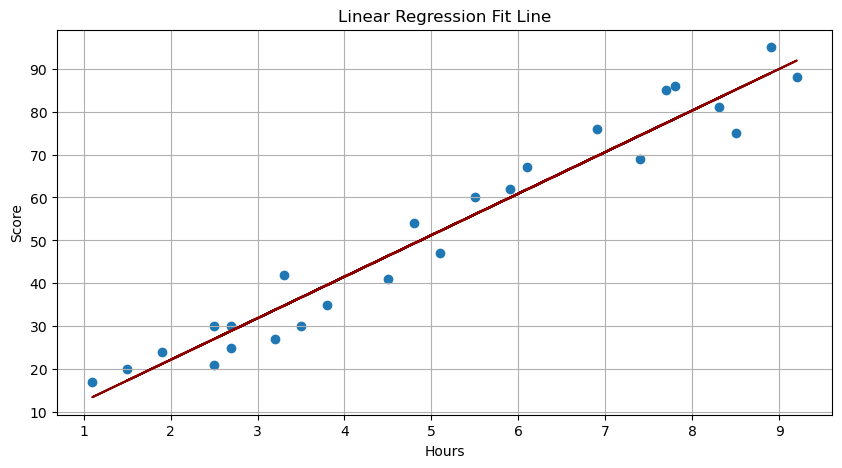

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, marker='green')
plt.plot(X, lr.predict(X), color='darkred')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Linear Regression Fit Line')
plt.grid(True)
plt.show()

## Model Evaluation

In [ ]:
MODEL = []
TEST = []
TRAIN = []
MAE = []
MSE = []
def push_result(model,test,train,mae,mse):
    MODEL.append(model)
    TEST.append(round(test,2))
    TRAIN.append(round(train,2))
    MAE.append(round(mae,2))
    MSE.append(round(mse,2))

In [ ]:
mae = mean_absolute_error(y_test, lr_pred)
mse = mean_squared_error(y_test, lr_pred)

In [ ]:
train = lr.score(X_train, y_train)*100

In [ ]:
test = lr.score(X_test, y_test)*100

In [ ]:
push_result('Linear Regression', test, train, mae, mse)

In [ ]:
results = pd.DataFrame({ 'ML Model': MODEL,
                         'Testing Accuracy': TEST,
                         'Training Accuracy': TRAIN,
                         'Mean Absolute Error (MAE)': MAE,
                         'Mean Squared Error (MSE)': MSE })
results.T

,0
ML Model,Linear Regression
Testing Accuracy,96.78
Training Accuracy,94.91
Mean Absolute Error (MAE),3.92
Mean Squared Error (MSE),18.94
